In [1]:
from kasteleyn_triangular import *
setfont()

0

## Lattice, paths, and weights
We can plot various paths. 'triangle_string' creates vertical or horizontal paths
Note this lattice is reflected compared to the orientation used in the paper.

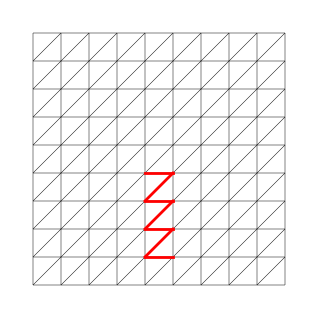

0

In [2]:
# default path is vertical
plt.rcParams['figure.dpi'] = 50
plot_shape_bool(10, square_bool, string=triangle_string(10,5),\
                kmat=kasteleyn_tri21(10,square_bool), pt=16,axes=False, \
                edge_col='k', savename='triangular_lattice10.pdf')

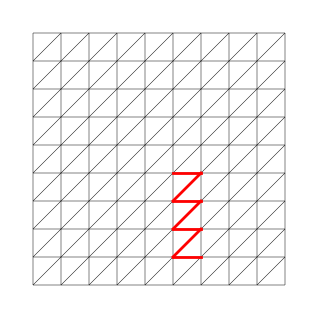

0

In [3]:
# shifted vertical path
plt.rcParams['figure.dpi'] = 50
plot_shape_bool(10, square_bool, string=triangle_string(10,5,vert=True, colshift=1),\
                kmat=kasteleyn_tri21(10,square_bool), pt=16,axes=False, \
                edge_col='k')

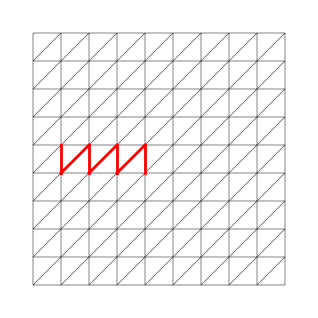

0

In [4]:
# horizontal path
plt.rcParams['figure.dpi'] = 50
plot_shape_bool(10, square_bool, string=triangle_string(10,5,vert=False),\
                kmat=kasteleyn_tri21(10,square_bool), pt=16,axes=False, \
                edge_col='k')

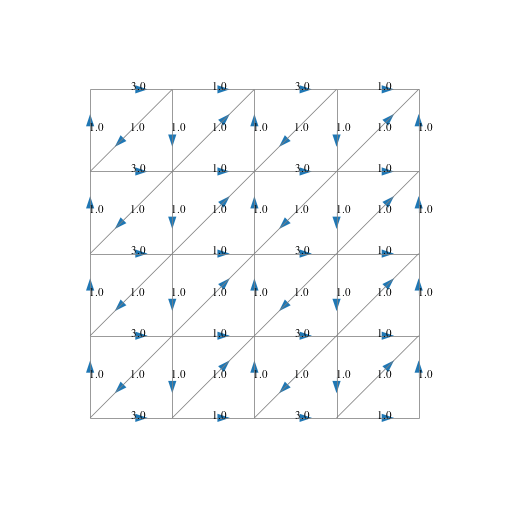

0

In [5]:
# Label weights and Kasteleyn orientation
plt.rcParams['figure.dpi'] = 80
plot_shape_bool(5, square_bool,
                kmat=kasteleyn_tri21(5,square_bool,[3,1,1,1,1,1]), weights=True, pt=16,axes=False)

## Generate dimer and vison correlators along fixed path

This section assumes we have already computed and saved vison and dimer correlators, e.g. using something like
save_vd(304,[0.5,1,2.5,3,3.5,4,5],filepath='./data_vd_304',vert=True)

### Vertical path

In [6]:
colors2 = ['navy','teal','purple','red','tab:orange','tab:olive','tab:gray']
alist = [0.5,1,2.5,3,3.5,4,5] # choose a list of parameter values to plot (must be saved already)
vlist, dlist = load_vd(304,alist= alist,filepath='./data_vd_304') # load saved vison and dimer correlators

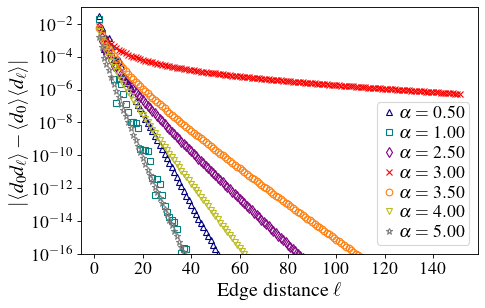

In [7]:
plt.rcParams["figure.figsize"] = (6.4,4)
dimerplot_slopes(dlist,alist, 150,pt=18,ymin=10**-16,ymax=.1,savename='triangular_dimer_n304.pdf',\
                 legendloc='lower right', colorlist=colors2);

-2.0691206463993117


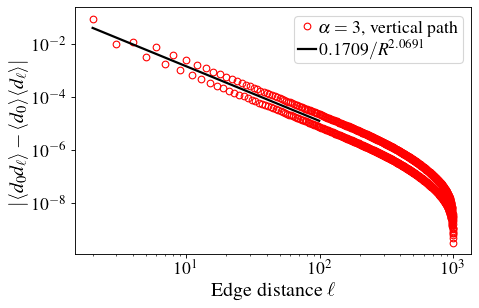

In [8]:
d = np.load('./data_critical/tri_dimers_n1002_a3.00_v_shift0.npy')
plt.plot(range(2,len(d)+2), d,'o',fillstyle='none',color='red',label=r'$\alpha=3$, vertical path')
pt = 18
startslope = 2
end = 100
linregress = sp.stats.linregress(np.log(range(startslope,end)), np.log(np.abs(np.array(d[startslope-2:end-2]))))
slope, intercept =  linregress[:2]
print(slope)
xvals=np.arange(startslope,end)
plt.plot(xvals,np.exp(intercept)/xvals**-slope,'k', label=r'$%.4f/R^{%.4f}$'%(np.exp(intercept),np.abs(slope)),linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=pt-2,labelspacing=0.2, handletextpad=0.2, \
                       borderpad=.2, handlelength=1, loc='best')
plt.xlabel(r'Edge distance $\ell$',fontsize=pt)
plt.ylabel(r'$|\langle d_0d_\ell\rangle-\langle d_0\rangle\langle d_\ell\rangle|$',\
                   fontsize=pt)
plt.xticks(fontsize=pt-2)
plt.yticks(fontsize=pt-2)
plt.savefig('dimerloglog_a3_n1002_%i-%i.pdf'%(startslope,end), bbox_inches='tight')

a=0.50: vison slope fit stopping at face distance 99
a=1.00: vison slope fit stopping at face distance 77


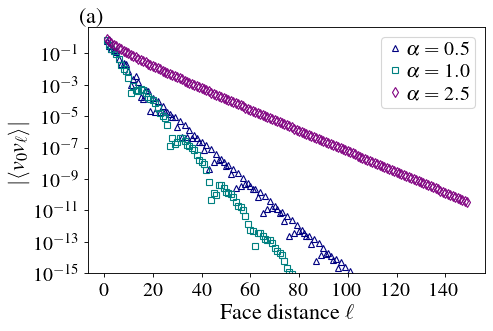

In [9]:
plt.rcParams["figure.figsize"] = (6.4,4)
visonplot_slopes(vlist,alist[:3],150,savename='triangular_visons_n304_1.pdf',pt=20,text='(a)',xtext=-10,ytext=10,\
                ymin=10**-15,ymax=5, colorlist=colors2);

a=0.50: vison slope fit stopping at face distance 99
a=1.00: vison slope fit stopping at face distance 77


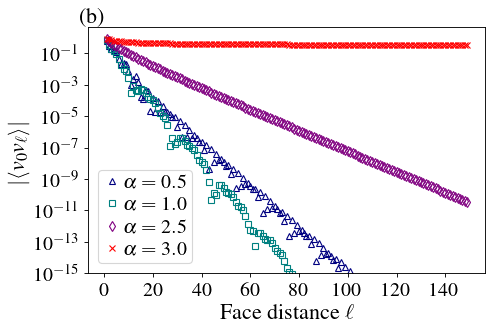

In [10]:
plt.rcParams["figure.figsize"] = (6.4,4)
visonplot_slopes(vlist,alist[:4],150,savename='triangular_visons_n304_1b.pdf',pt=20,text='(b)',xtext=-10,ytext=10,\
                ymin=10**-15,ymax=5, colorlist=colors2);

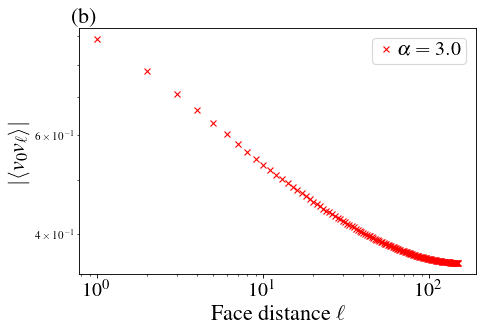

In [11]:
plt.rcParams["figure.figsize"] = (6.4,4)
visonplot_slopes(vlist[3:,:],[alist[3]],150,xlog=True,ymin=0,savename='triangular_visons_n304_2.pdf',pt=20,\
         text='(b)',xtext=.7,ytext=.95,startcolorindex=3, colorlist=colors2);

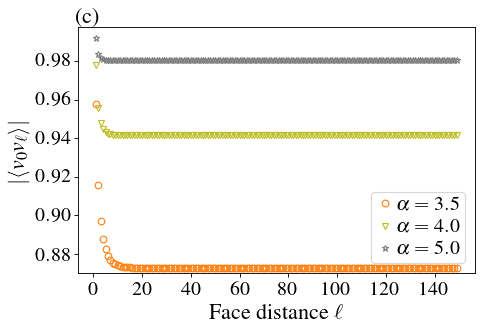

In [12]:
plt.rcParams["figure.figsize"] = (6.4,4)
visonplot_slopes(vlist[4:,:],alist[4:],150,ylog=False,ymin=.87,savename='triangular_visons_n304_3.pdf',pt=20,\
          text='(c)',xtext=-7,ytext=1,legendloc='lower right',startcolorindex=4, colorlist=colors2);

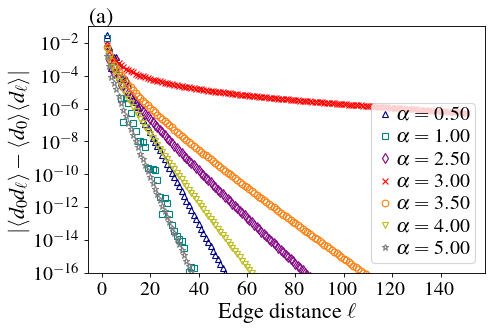

In [13]:
# larger font for smaller figure
plt.rcParams["figure.figsize"] = (6.4,4)
dimerplot_slopes(dlist,alist, 150,pt=20,ymin=10**-16,ymax=.1,savename='triangular_dimer_n304_s.pdf',\
                 legendloc='lower right', colorlist=colors2,text='(a)',xtext=-5,ytext=.17);

### Vertical path shifted over
We can already consider the vertical path shifted over by 1, which goes through differently weighted horizontal edges.

In [14]:
alist = [0.5,1,2.5,3,3.5,4,5]
vlist_shift, dlist_shift = load_vd(304,alist= alist,filepath='./data_vd_304',colshift=1)
plt.rcParams['figure.dpi'] = 100

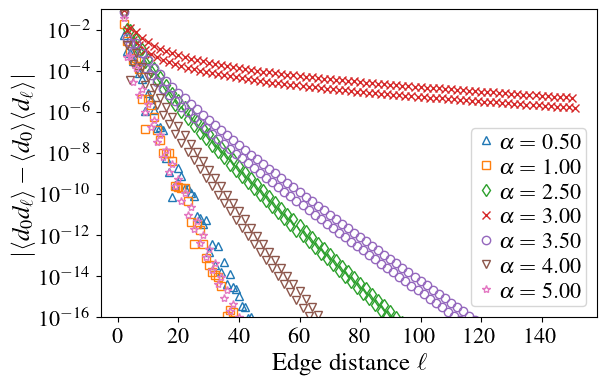

In [15]:
plt.rcParams["figure.figsize"] = (6.4,4)
dimerplot_slopes(dlist_shift,alist, 150,pt=18,ymin=10**-16,ymax=.1,savename='triangular_dimer_n304_shift.pdf',\
                 legendloc='lower right');

-2.0120600712598966


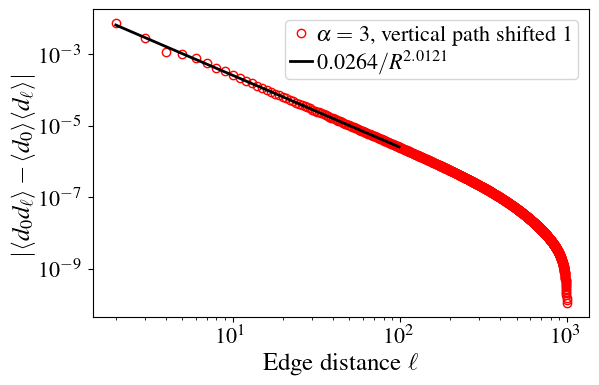

In [16]:
d1 = np.load('./data_critical/tri_dimers_n1002_a3.00_v_shift1.npy')
plt.plot(range(2,len(d1)+2), d1,'o',fillstyle='none',color='red',label=r'$\alpha=3$, vertical path shifted 1')
pt = 18
startslope = 2
end = 100
linregress = sp.stats.linregress(np.log(range(startslope,end)), np.log(np.abs(np.array(d1[startslope-2:end-2]))))
slope, intercept =  linregress[:2]
print(slope)
xvals=np.arange(startslope,end)
plt.plot(xvals,np.exp(intercept)/xvals**-slope,'k', label=r'$%.4f/R^{%.4f}$'%(np.exp(intercept),np.abs(slope)),linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=pt-2,labelspacing=0.2, handletextpad=0.2, \
                       borderpad=.2, handlelength=1, loc='best')
plt.xlabel(r'Edge distance $\ell$',fontsize=pt)
plt.ylabel(r'$|\langle d_0d_\ell\rangle-\langle d_0\rangle\langle d_\ell\rangle|$',\
                   fontsize=pt)
plt.xticks(fontsize=pt-2)
plt.yticks(fontsize=pt-2)
plt.savefig('dimerloglog_a3_n1002_%i-%i_vert_shift1.pdf'%(startslope,end), bbox_inches='tight')

a=1.00: vison slope fit stopping at face distance 78


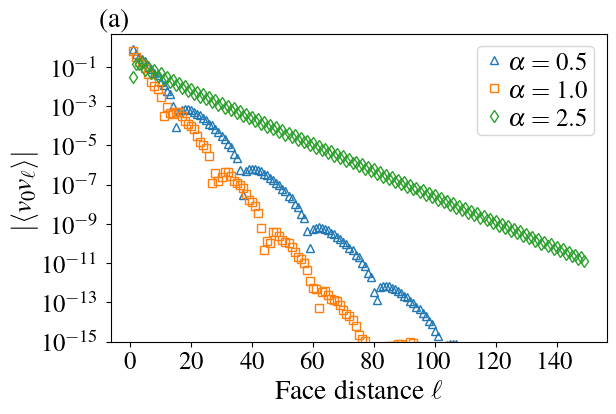

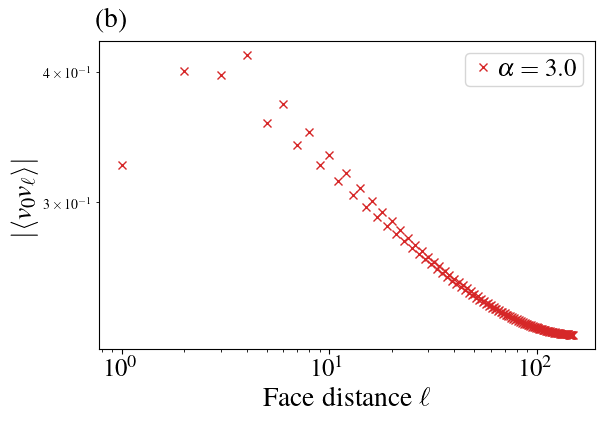

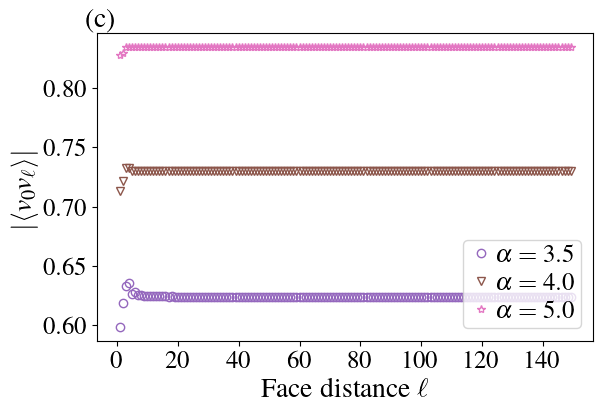

In [17]:
plt.rcParams["figure.figsize"] = (6.4,4)
visonplot_slopes(vlist_shift,alist[:3],150,pt=20,text='(a)',xtext=-10,ytext=10,\
                ymin=10**-15,ymax=5);
visonplot_slopes(vlist_shift[3:,:],[alist[3]],150,xlog=True,ymin=0,pt=20,\
         text='(b)',xtext=.75,ytext=.44,startcolorindex=3);
visonplot_slopes(vlist_shift[4:,:],alist[4:],150,ylog=False,pt=20,ymin=0,\
          text='(c)',xtext=-10,ytext=.85,legendloc='lower right',startcolorindex=4);

### Horizontal path

In [18]:
alist = [0.5,1,2.5,3,3.5,4,5]
vlist_h,dlist_h = load_vd(304,alist= alist,filepath='./data_vd_304',vert=False)

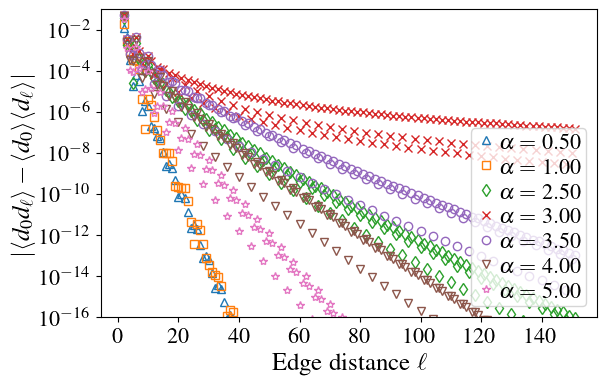

In [19]:
plt.rcParams["figure.figsize"] = (6.4,4)
dimerplot_slopes(dlist_h,alist, 150,pt=18,ymin=10**-16,ymax=.1,savename='triangular_dimer_n304_hor.pdf',\
                 legendloc='lower right');

-2.977417783437755


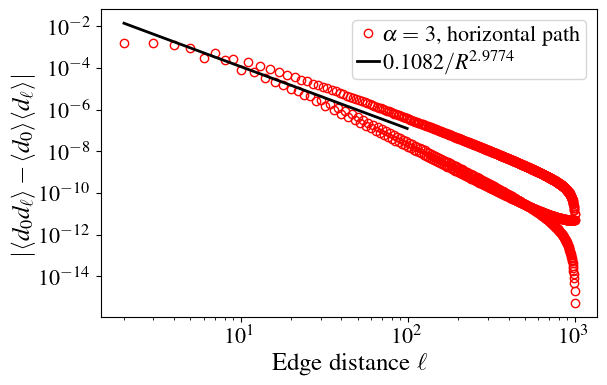

In [20]:
dh = np.load('./data_critical/tri_dimers_n1002_a3.00_h_shift0.npy')
plt.plot(range(2,len(dh)+2), dh,'o',fillstyle='none',color='red',label=r'$\alpha=3$, horizontal path')
pt = 18
startslope = 2
end = 100
linregress = sp.stats.linregress(np.log(range(startslope,end)), np.log(np.abs(np.array(dh[startslope-2:end-2]))))
slope, intercept =  linregress[:2]
print(slope)
xvals=np.arange(startslope,end)
plt.plot(xvals,np.exp(intercept)/xvals**-slope,'k', label=r'$%.4f/R^{%.4f}$'%(np.exp(intercept),np.abs(slope)),linewidth=2)
#plt.plot(xvals,2/xvals**4,'b', label=r'$2/R^4$',linewidth=2)
#plt.plot(xvals,.01/xvals**2,'b', label=r'$%.4f/R^2$'%(np.exp(intercept)),linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=pt-2,labelspacing=0.2, handletextpad=0.2, \
                       borderpad=.2, handlelength=1, loc='best')
plt.xlabel(r'Edge distance $\ell$',fontsize=pt)
plt.ylabel(r'$|\langle d_0d_\ell\rangle-\langle d_0\rangle\langle d_\ell\rangle|$',\
                   fontsize=pt)
plt.xticks(fontsize=pt-2)
plt.yticks(fontsize=pt-2)
plt.savefig('dimerloglog_a3_n1002_%i-%i_horizontal.pdf'%(startslope,end), bbox_inches='tight')

a=0.50: vison slope fit stopping at face distance 79
a=1.00: vison slope fit stopping at face distance 77


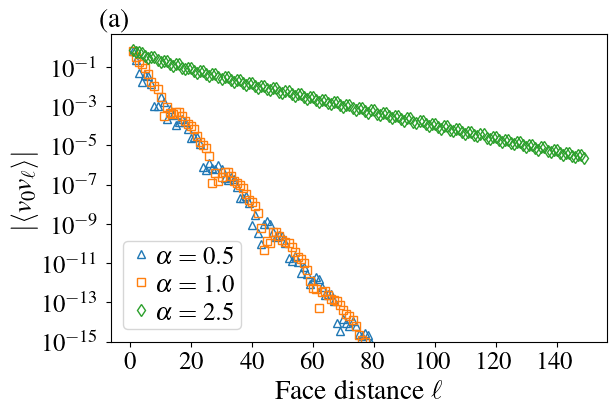

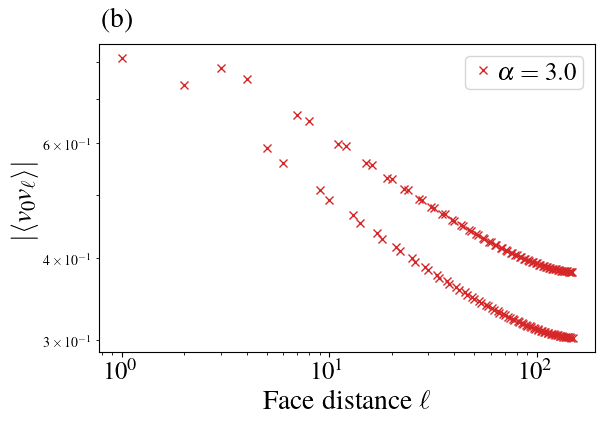

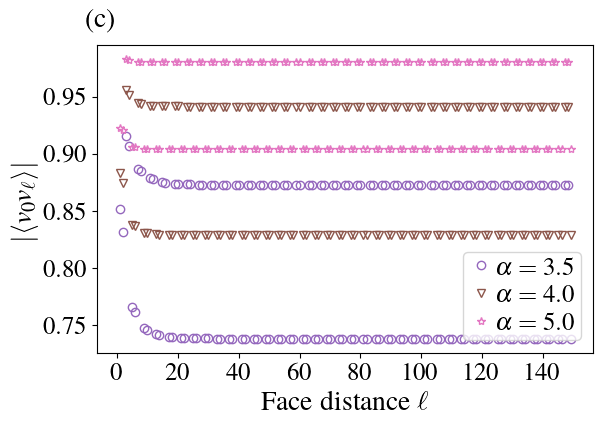

In [21]:
plt.rcParams["figure.figsize"] = (6.4,4)
visonplot_slopes(vlist_h,alist[:3],150,pt=20,text='(a)',xtext=-10,ytext=10,\
                ymin=10**-15,ymax=5);
visonplot_slopes(vlist_h[3:,:],[alist[3]],150,xlog=True,ymin=0,pt=20,\
         text='(b)',xtext=.8,ytext=.9,startcolorindex=3);
visonplot_slopes(vlist_h[4:,:],alist[4:],150,ylog=False,pt=20,ymin=0,\
          text='(c)',xtext=-10,ytext=1.01,legendloc='lower right',startcolorindex=4);

## Correlation lengths
We can estimate the correlation lengths of the dimer-dimer and vison correlators for various parameter values. Since we plot this as a function of the parameter alpha, we consider many more values of alpha than in the previous plots.

In [22]:
alistfull = np.concatenate((np.arange(0,4.1,.1),[4.25,4.5,4.75,5,5.5,6], [2.85,2.95,3.01,3.02,3.05,3.15]))
alist2 = np.concatenate((np.arange(0,4.1,.1),[4.25,4.5,4.75,5,5.5,6]))

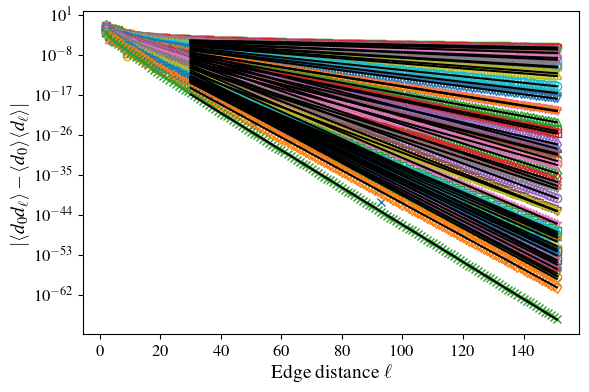

a=0.00: vison slope fit stopping at face distance 150
a=0.10: vison slope fit stopping at face distance 138
a=0.20: vison slope fit stopping at face distance 126
a=0.30: vison slope fit stopping at face distance 116
a=0.40: vison slope fit stopping at face distance 108
a=0.50: vison slope fit stopping at face distance 100
a=0.60: vison slope fit stopping at face distance 93
a=0.70: vison slope fit stopping at face distance 88
a=0.80: vison slope fit stopping at face distance 83
a=0.90: vison slope fit stopping at face distance 77
a=1.00: vison slope fit stopping at face distance 77
a=1.10: vison slope fit stopping at face distance 78
a=1.20: vison slope fit stopping at face distance 81
a=1.30: vison slope fit stopping at face distance 84
a=1.40: vison slope fit stopping at face distance 85
a=1.50: vison slope fit stopping at face distance 87
a=1.60: vison slope fit stopping at face distance 88
a=1.70: vison slope fit stopping at face distance 91
a=1.80: vison slope fit stopping at face

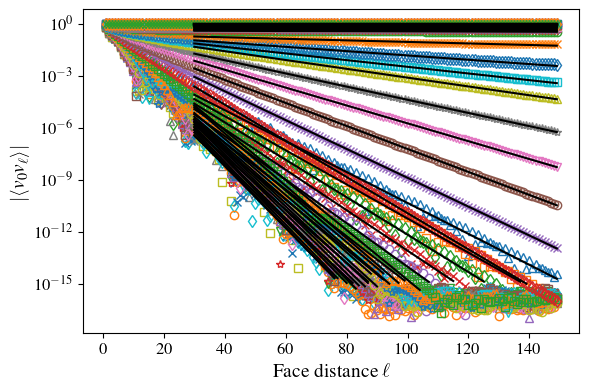

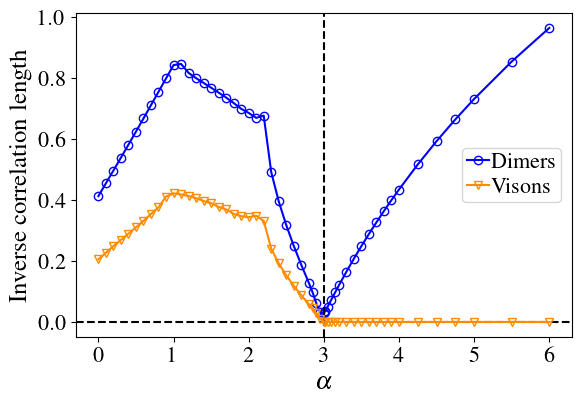

0

In [23]:
# correlation lengths for the default vertical path
corr_lengths(304,alistfull,filepath='data_vd_304',startslope=30,end=150,vert=True,colshift=0)

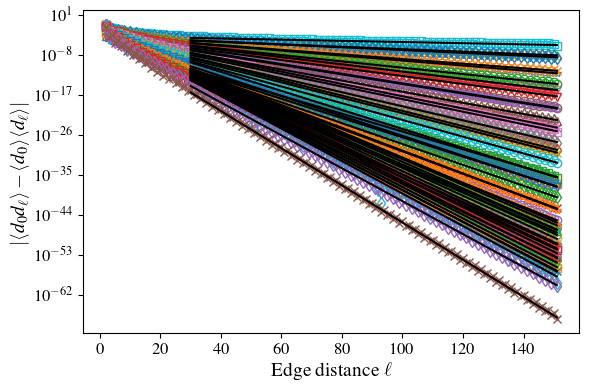

a=0.10: vison slope fit stopping at face distance 142
a=0.20: vison slope fit stopping at face distance 128
a=0.30: vison slope fit stopping at face distance 118
a=0.40: vison slope fit stopping at face distance 110
a=0.50: vison slope fit stopping at face distance 102
a=0.60: vison slope fit stopping at face distance 96
a=0.70: vison slope fit stopping at face distance 90
a=0.80: vison slope fit stopping at face distance 85
a=0.90: vison slope fit stopping at face distance 81
a=1.00: vison slope fit stopping at face distance 78
a=1.10: vison slope fit stopping at face distance 77
a=1.20: vison slope fit stopping at face distance 77
a=1.30: vison slope fit stopping at face distance 80
a=1.40: vison slope fit stopping at face distance 80
a=1.50: vison slope fit stopping at face distance 82
a=1.60: vison slope fit stopping at face distance 83
a=1.70: vison slope fit stopping at face distance 87
a=1.80: vison slope fit stopping at face distance 86
a=1.90: vison slope fit stopping at face 

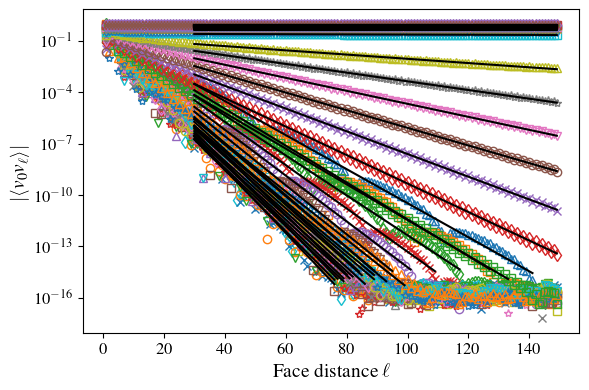

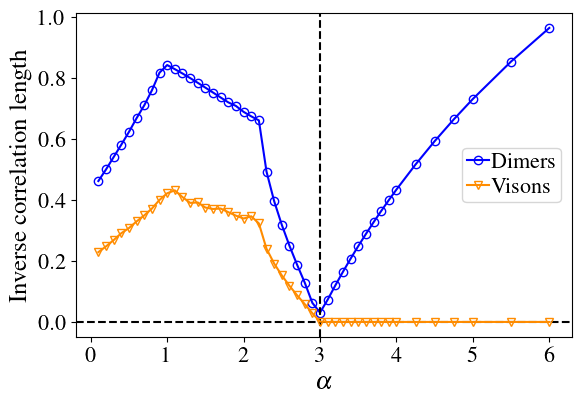

0

In [24]:
# correlation lengths for the vertical path shifted over by 1
corr_lengths(304,alist2[1:],filepath='data_vd_304',startslope=30,end=150,vert=True,colshift=1)

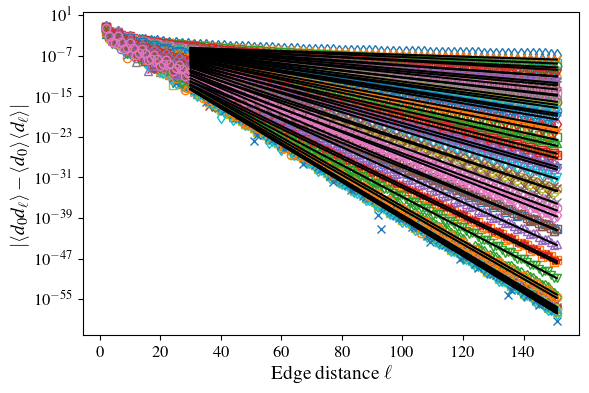

a=0.00: vison slope fit stopping at face distance 121
a=0.10: vison slope fit stopping at face distance 103
a=0.20: vison slope fit stopping at face distance 85
a=0.30: vison slope fit stopping at face distance 80
a=0.40: vison slope fit stopping at face distance 79
a=0.50: vison slope fit stopping at face distance 79
a=0.60: vison slope fit stopping at face distance 78
a=0.70: vison slope fit stopping at face distance 76
a=0.80: vison slope fit stopping at face distance 76
a=0.90: vison slope fit stopping at face distance 76
a=1.00: vison slope fit stopping at face distance 77
a=1.10: vison slope fit stopping at face distance 84
a=1.20: vison slope fit stopping at face distance 89
a=1.30: vison slope fit stopping at face distance 97
a=1.40: vison slope fit stopping at face distance 102
a=1.50: vison slope fit stopping at face distance 114
a=1.60: vison slope fit stopping at face distance 125
a=1.70: vison slope fit stopping at face distance 133
a=1.80: vison slope fit stopping at face

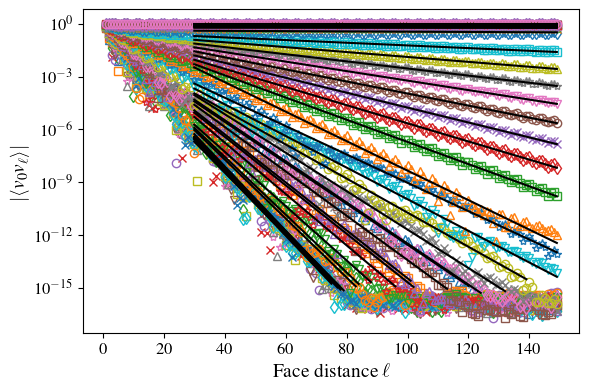

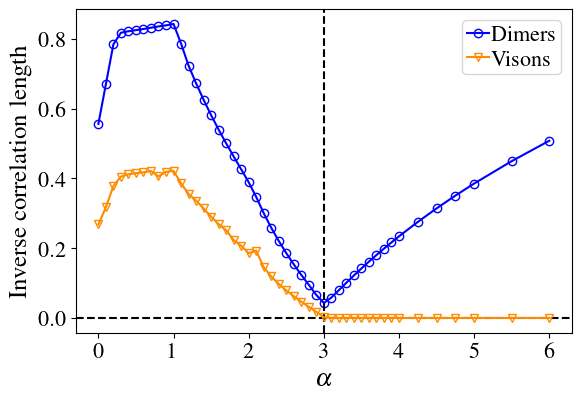

0

In [25]:
# correlation lengths for the horizontal path
corr_lengths(304,alist2,filepath='data_vd_304',startslope=30,end=150,vert=False)

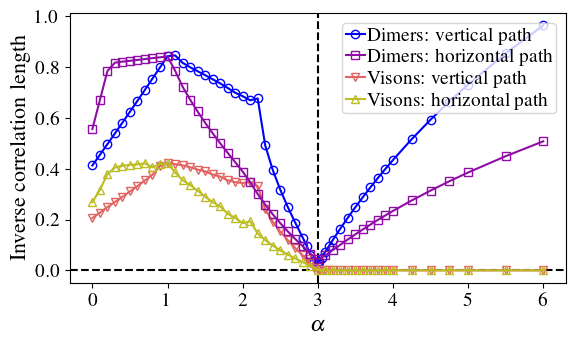

0

In [26]:
# plot all together
corr_lengths_all(304,[alistfull,alist2[1:],alist2],filepath='data_vd_304',startslope=30,end=150,\
                 legendloc='best',savename='invcorrelationlength_n304_30-150_all.pdf',figheight=3.5)

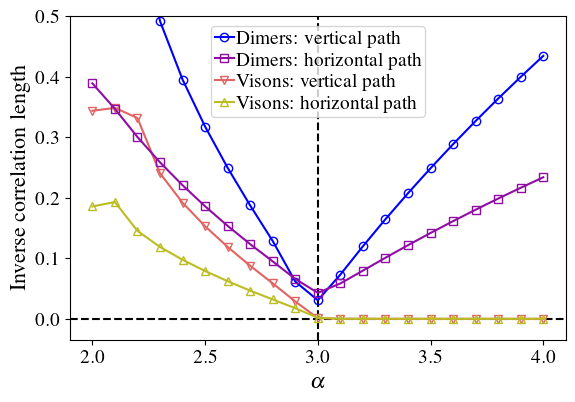

In [27]:
# zoom in near alpha=3, and plot all together
alist24 = np.concatenate((np.arange(2,4.1,.1), [2.85,2.95,3.01,3.02,3.05,3.15]))
alist242 = np.arange(2,4.1,.1)
ds,vs=corr_lengths_all(304,[alist242,alist242,alist242],filepath='data_vd_304',startslope=30,end=150,\
                 legendloc='best',ymax=.5,return_data=True)

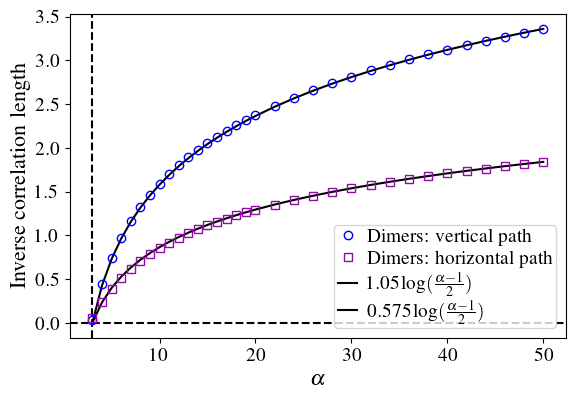

0

In [28]:
# inverse correlation lengths for larger alpha
corr_lengths_largea(304,filepath='./data_vd_304',savename='invcorrelationlength_n304_10-150_largea.pdf')

## K^{-1} decay and correlation lengths

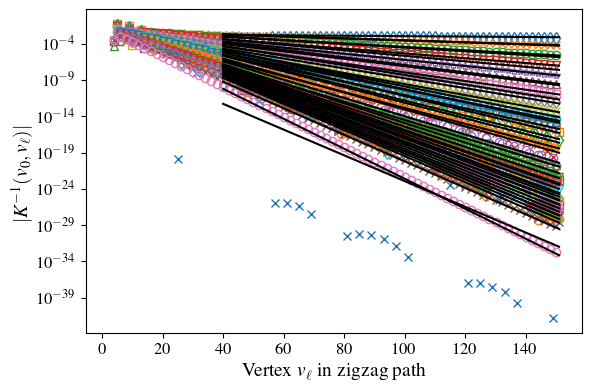

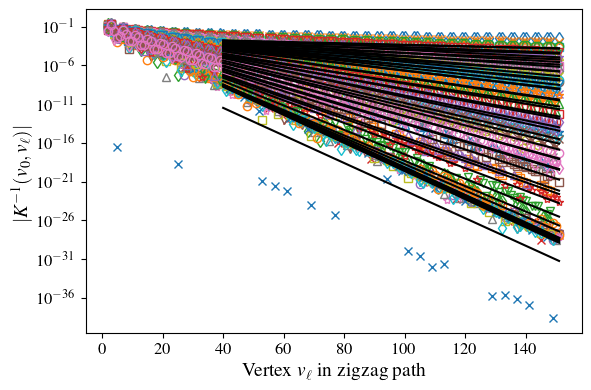

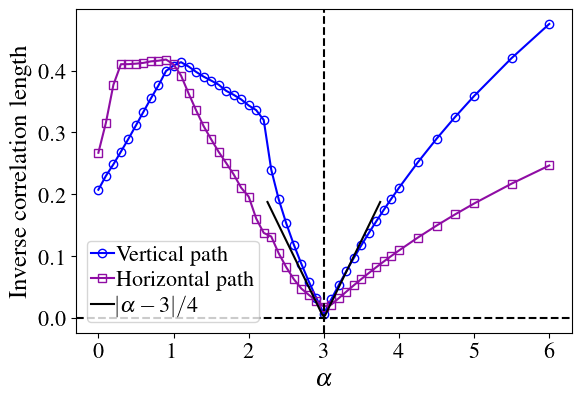

0

In [29]:
alist2 = np.concatenate((np.arange(0,4.1,.1),[4.25,4.5,4.75,5,5.5,6]))
kinv_corr_lengths(304,alist2,40,150,filepath='./data_kinv_304',savename='kinv_corr_n304_startslope40-150.pdf')

## Critical point vison correlation lengths

-0.2335984817421811


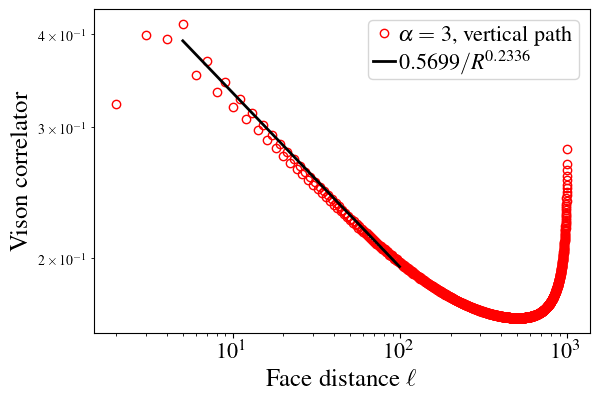

In [30]:
vcrit=np.load('./data_critical/tri_visons_n1002_a3.00_v_shift0.npy')
plt.plot(range(2,len(vcrit)+1), vcrit[1:],'o',fillstyle='none',color='red',label=r'$\alpha=3$, vertical path')
pt = 18
startslope = 5
end = 100
linregress = sp.stats.linregress(np.log(range(startslope,end)), np.log(np.abs(np.array(vcrit[startslope-2:end-2]))))
slope, intercept =  linregress[:2]
print(slope)
xvals=np.arange(startslope,end)
plt.plot(xvals,np.exp(intercept)/xvals**-slope,'k', label=r'$%.4f/R^{%.4f}$'%(np.exp(intercept),np.abs(slope)),\
         linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=pt-2,labelspacing=0.2, handletextpad=0.2, \
                       borderpad=.2, handlelength=1, loc='best')
plt.xlabel(r'Face distance $\ell$',fontsize=pt)
plt.ylabel('Vison correlator',\
                   fontsize=pt)
plt.xticks(fontsize=pt-2)
plt.yticks(fontsize=pt-2)
plt.savefig('visonloglog_a3_n1002_%i-%i_v0.pdf'%(startslope,end), bbox_inches='tight')

-0.2512483056530272


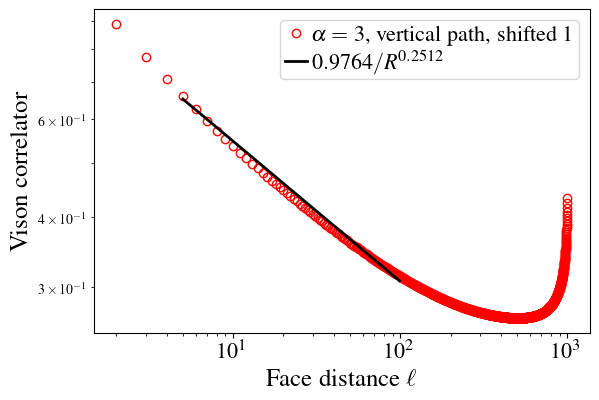

In [31]:
vcrit=np.load('./data_critical/tri_visons_n1002_a3.00_v_shift1.npy')
plt.plot(range(2,len(vcrit)+1), vcrit[1:],'o',fillstyle='none',color='red',label=r'$\alpha=3$, vertical path, shifted 1')
pt = 18
startslope = 5
end = 100
linregress = sp.stats.linregress(np.log(range(startslope,end)), np.log(np.abs(np.array(vcrit[startslope-2:end-2]))))
slope, intercept =  linregress[:2]
print(slope)
xvals=np.arange(startslope,end)
plt.plot(xvals,np.exp(intercept)/xvals**-slope,'k', label=r'$%.4f/R^{%.4f}$'%(np.exp(intercept),np.abs(slope)),\
         linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=pt-2,labelspacing=0.2, handletextpad=0.2, \
                       borderpad=.2, handlelength=1, loc='best')
plt.xlabel(r'Face distance $\ell$',fontsize=pt)
plt.ylabel('Vison correlator',\
                   fontsize=pt)
plt.xticks(fontsize=pt-2)
plt.yticks(fontsize=pt-2)
plt.savefig('visonloglog_a3_n1002_%i-%i_v1.pdf'%(startslope,end), bbox_inches='tight')

-0.26552033874862513


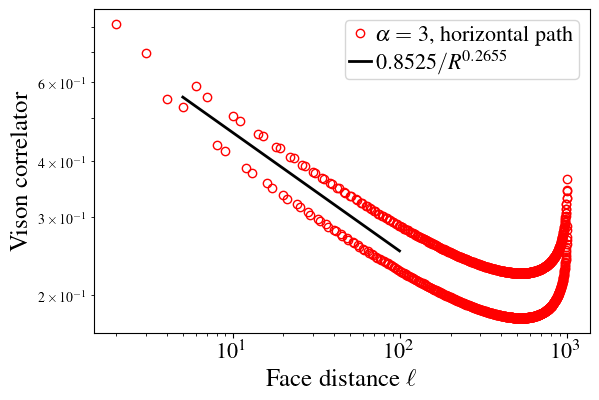

In [32]:
vcrit=np.load('./data_critical/tri_visons_n1002_a3.00_h_shift0.npy')
plt.plot(range(2,len(vcrit)+1), vcrit[1:],'o',fillstyle='none',color='red',label=r'$\alpha=3$, horizontal path')
pt = 18
startslope = 5
end = 100
linregress = sp.stats.linregress(np.log(range(startslope,end)), np.log(np.abs(np.array(vcrit[startslope-2:end-2]))))
slope, intercept =  linregress[:2]
print(slope)
xvals=np.arange(startslope,end)
plt.plot(xvals,np.exp(intercept)/xvals**-slope,'k', label=r'$%.4f/R^{%.4f}$'%(np.exp(intercept),np.abs(slope)),\
         linewidth=2)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=pt-2,labelspacing=0.2, handletextpad=0.2, \
                       borderpad=.2, handlelength=1, loc='best')
plt.xlabel(r'Face distance $\ell$',fontsize=pt)
plt.ylabel('Vison correlator',\
                   fontsize=pt)
plt.xticks(fontsize=pt-2)
plt.yticks(fontsize=pt-2)
plt.savefig('visonloglog_a3_n1002_%i-%i_h0.pdf'%(startslope,end), bbox_inches='tight')